# Convolution Kernels - The First Line of Inference

A convolution kernel is a matrix of some size m x n which is applied onto m x n swaths of an input image to produce a corresponding, modified output image. Modifications include sharpen, blur, edge detect and outline detect. Some kernels like the edge-detecting Sobel's kernel are useful to apply directly here as a convolution on source image swaths. However, others like blur are better dealt with using a Fourier Transform in the frequency domain. 

Yes, pun in title is intended :D

In [1001]:
import cv2
import numpy
import matplotlib.pyplot as plt

## Defining Kernels

In [1002]:
outline = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] # The outline kernel
outline = numpy.asanyarray(outline, numpy.float32) # Convert to float32 for convolution in cv2

In [1003]:
vedfilter = [[1,0,-1],[1,0,-1],[2,0,-2]] # Vertical edge detect filter
vedfilter = numpy.asanyarray(vedfilter,numpy.float32)

In [1004]:
hedfilter = numpy.matrix.transpose(vedfilter) # Horizontal edge detect filter

## The Image

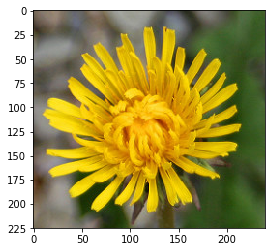

In [1005]:
image = cv2.imread("flower.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # Convert to RGB channel ordering (default is BGR)
plt.imshow(image)
plt.show()

### The cv2.filter2D( ) function

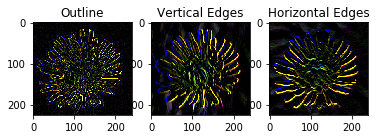

In [1006]:
outlined = cv2.filter2D(image,-1,outline);
plt.subplot(131)
plt.title('Outline')
plt.imshow(outlined)

ved = cv2.filter2D(image,-1,vedfilter);
plt.subplot(132)
plt.title('Vertical Edges')
plt.imshow(ved)

hed = cv2.filter2D(image,-1,hedfilter);
plt.subplot(133)
plt.title('Horizontal Edges')
plt.imshow(hed)
plt.show()

## How 2D Convolution works in Keras

In [1007]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation

image = cv2.imread('coke.jpg')

### Setting parameters

In [1008]:
kernelSize = 5
poolingSize = 2

### Convolution Layer (without activation)

In [1009]:
model = Sequential()
model.add(Conv2D(3,(kernelSize,kernelSize),input_shape=image.shape))

### Adding Rectified Linear Unit (ReLU) activation for Convolution Layer

In [1010]:
model2 = Sequential()
model2.add(Conv2D(3,(kernelSize,kernelSize),activation='relu',input_shape=image.shape))

### MaxPooling Layer

In [1011]:
model3 = Sequential()
model3.add(Conv2D(3,(kernelSize,kernelSize),activation='relu',input_shape=image.shape))
model3.add(MaxPooling2D(poolingSize,poolingSize))

In [1012]:
def showConvolutedImage(model,image,string):
    batch = numpy.expand_dims(image,axis=0)
    conv = model.predict(batch)
    conv = numpy.squeeze(conv,axis = 0)
    print(conv.shape)
    #conv = conv.reshape(image.shape)
    plt.title(string)
    plt.imshow(conv)
    plt.show()

(512, 296, 3)


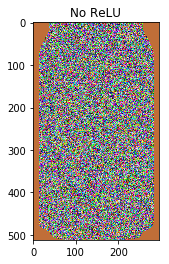

(512, 296, 3)


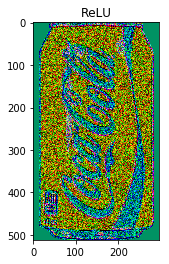

(256, 148, 3)


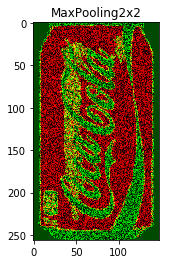

In [1013]:
showConvolutedImage(model,image,'No ReLU')
showConvolutedImage(model2,image,'ReLU')
showConvolutedImage(model3,image,'MaxPooling'+str(poolingSize)+'x'+str(poolingSize))

## Conclusions

The 'Convolutional' part in Convolutional Neural Networks is the image pattern extraction phase. First, the image passes through a (usually) 2D convolutional layer with an appropriate activation function such as the Rectified Linear Unit(ReLU). Next, a MaxPooling Layer performs downsampling on the large amount of input data and feeds it forward to the next layer.

In essence, the convolutional weights contribute to the visible feature extraction, while the pooling layers are meant to 'zoom out' and possibly combine patterns to obtain the bigger picture.

#### Factors affecting Convolution and Pooling
 It is important to note that the setting of training parameters is crucial to the performance of the algorithm. A large convolution swath may miss small details in the image but can be done in less steps (though not necessarily quicker). Furthermore, a higher Pooling stride length may mush lower-level details together. Thus care must be taken to ensure the convolution and pooling layers produce generally positive results before adding dense layers for backpropagation of error.